In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import geopandas as gpd
import pandas as pd

In [2]:
M2_RF = xr.open_dataset("/pl/active/nasa_smb/Data/RF_Snow_Red_prelim.nc")

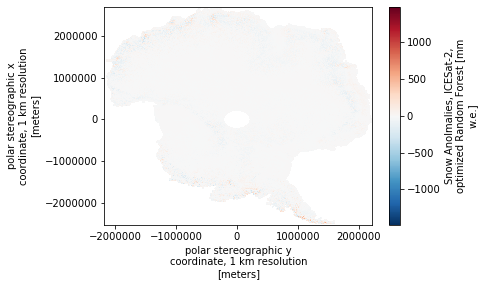

In [3]:
M2_RF['IS2_opt'].plot()

# Build X and Y grids

In [12]:
X, Y = np.meshgrid(M2_RF['x'], M2_RF['y'])
print(X.shape)
X = X.flatten()
Y = Y.flatten()

(4401, 5221)


# Count the number of non-nan grid cells

In [13]:
perturbation = np.transpose(M2_RF['IS2_opt'].values)
print(perturbation.shape)
perturbation = perturbation.flatten()
n_grid_cells = np.count_nonzero(~np.isnan(perturbation))
print(n_grid_cells / 1e6) # 13 million grid cells! 

(4401, 5221)
13.540572


# Realistically, I can probably only train on ~1000 snowpack simulations!

-3.002507
34.31684


(array([  1.,   2.,   4.,  29., 369.,  83.,   8.,   1.,   2.,   1.]),
 array([-247.22475 , -196.24782 , -145.27089 ,  -94.29397 ,  -43.31704 ,
           7.659889,   58.636818,  109.61375 ,  160.59067 ,  211.5676  ,
         262.54453 ], dtype=float32),
 <a list of 10 Patch objects>)

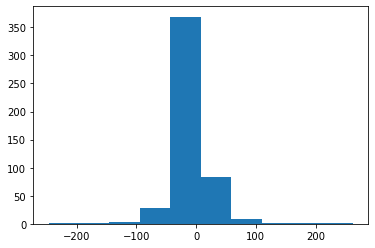

In [14]:
n_sample = 500
perturbation_non_nan = perturbation[np.logical_not(np.isnan(perturbation))]
X = X[np.logical_not(np.isnan(perturbation))]
Y = Y[np.logical_not(np.isnan(perturbation))]

inds_sample = np.random.randint(0, X.shape, n_sample)

perturbation_sample = perturbation_non_nan[inds_sample]
X_sample = X[inds_sample]
Y_sample = Y[inds_sample]

print(perturbation_sample.mean())
print(perturbation_sample.std())

plt.hist(perturbation_sample)

# Make map of sample

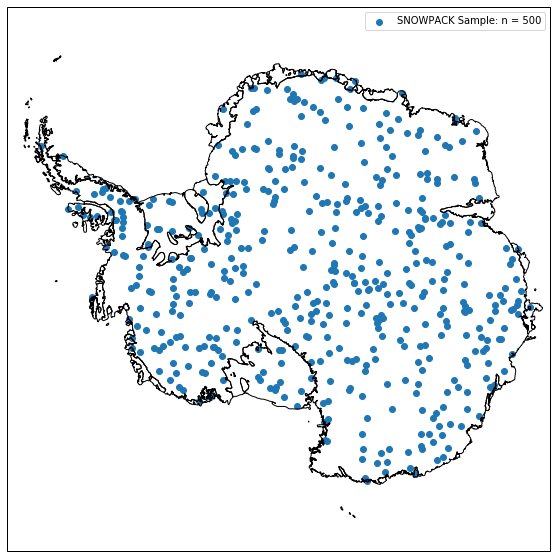

In [15]:
# Generate figure 
df = gpd.read_file("/pl/active/nasa_smb/Data/ADD_Coastline_low_res_polygon.shp")
crs_epsg = ccrs.SouthPolarStereo()
df_epsg = df.to_crs(epsg='3031')
fig, axs = plt.subplots(1, 1, subplot_kw={'projection': crs_epsg},
                        figsize=(10, 10))

# Plot coastlines
axs.set_extent((-180, 180, -65, -90), ccrs.PlateCarree())
axs.add_geometries(df_epsg['geometry'], crs=crs_epsg,
                      facecolor='none', edgecolor='black')

# Plot ICESat-2
plt.scatter(X_sample, Y_sample, transform=crs_epsg, label='SNOWPACK Sample: n = ' + str(n_sample))
plt.legend()